In [15]:
# Imports

import pandas as pd
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy import stats
import matplotlib as mp

In [17]:
# Import Workout.csv file

mydata = pd.read_csv('Workout.csv')
print('Workout.csv')
mydata

Workout.csv


,Body Part,Type of Muscle,Workout,Sets,Reps per Set
0,Chest,Upper Chest,Incline dumbbell press,3.5,10.0
1,Chest,Upper Chest,Incline cable crossovers,3.5,12.5
2,Chest,Upper Chest,Incline dumbbell flyes,3.5,12.5
3,Chest,Lower Chest,Decline dumbbell press,3.5,10.0
4,Chest,Lower Chest,Decline cable crossovers,3.5,12.5
5,Chest,Lower Chest,Decline dumbbell flyes,3.5,12.5
6,Chest,Chest Isolation,Chest flyes,3.5,12.5
7,Chest,Chest Isolation,Cable crossovers,3.5,12.5
8,Chest,Chest Isolation,Dumbbell flyes,3.5,12.5
9,Back,Upper,Pull-ups,3.5,10.0


In [19]:
# 2.) Descriptive statistics for something

repsperset_statistics = mydata.describe()
print(repsperset_statistics)

# Count - There are 52 (0-51) exercises in the data set.
# Mean - The average 11.48 Reps per Set.
# STD -  There is some variability of Reps per Set depending on how difficult the exercise is for different muscle groups.
# MIN - The lowest Reps per Set for an exercise which is holding a plank for 30-60 seconds for 1 set.
# 25% - 25% of exercises have 10 Reps per Set or less
# 50% - 50% of exercises have 12.5 Reps per Set or less
# 75% - 75% of exercises have 12.5 Reps per Set or less, same as 50%
# MAX - The highest Reps per Set for an exercise which is 18.

       Reps per Set
count     52.000000
mean      11.480769
std        2.425279
min        1.000000
25%       10.000000
50%       12.500000
75%       12.500000
max       18.000000


In [21]:
# 3a.) Usng ANOVA TEST and Variability TEST
# 3b.) Defining how many reps per set for each body part

Chest = mydata[mydata['Body Part'] == 'Chest']['Reps per Set']
Back = mydata[mydata['Body Part'] == 'Back']['Reps per Set']
Arms = mydata[mydata['Body Part'] == 'Arms']['Reps per Set']
Legs = mydata[mydata['Body Part'] == 'Legs']['Reps per Set']
Shoulders = mydata[mydata['Body Part'] == 'Shoulders']['Reps per Set']
Abs = mydata[mydata['Body Part'] == 'Abs']['Reps per Set']
Forearms = mydata[mydata['Body Part'] == 'Forearms']['Reps per Set']

print('Chest')
print(Chest,'\n')

print('Back')
print(Back,'\n')

print('Arms')
print(Arms,'\n')

print('Legs')
print(Legs,'\n')

print('Shoulders')
print(Shoulders,'\n')

print('Abs')
print(Abs,'\n')

print('Forearms')
print(Forearms,'\n')

Chest
0    10.0
1    12.5
2    12.5
3    10.0
4    12.5
5    12.5
6    12.5
7    12.5
8    12.5
Name: Reps per Set, dtype: float64 

Back
9     10.0
10    10.0
11    10.0
12    10.0
13    10.0
14    12.5
15    12.5
Name: Reps per Set, dtype: float64 

Arms
16    10.0
17    10.0
18    10.0
19    10.0
20    10.0
21    10.0
22    10.0
23    10.0
24    10.0
25    10.5
Name: Reps per Set, dtype: float64 

Legs
26    10.0
27    10.0
28    12.5
29    10.0
30    12.5
31    10.0
32    12.5
33    17.5
34    18.0
Name: Reps per Set, dtype: float64 

Shoulders
35    10.0
36    10.0
37    12.5
38    12.5
39    12.5
Name: Reps per Set, dtype: float64 

Abs
40    12.5
41    12.5
42    12.5
43    12.5
44    12.5
45     1.0
Name: Reps per Set, dtype: float64 

Forearms
46    12.5
47    12.5
48    17.5
49    12.5
50    12.5
51    12.5
Name: Reps per Set, dtype: float64 



In [23]:
# i.) Null and alternate hypothesis

# N() Null: There's no difference in how many reps we do for each body part
# NA Alternate: There's a difference in how mnay reps we do for each body part
# Two Tailed

In [25]:
# c.) Calculation of ANOVA and P-Value

statistic, p_value = stats.f_oneway(Chest, Back, Arms, Legs, Shoulders, Abs, Forearms)
print("ANOVA (F-Test):", statistic)
print("P-value:", p_value)

ANOVA (F-Test): 1.9675087308075088
P-value: 0.09045037316872112


In [27]:
# 5.) Summarize findings

alpha = 0.05
if p_value < alpha:
    print('Number of reps are significantly different between exercises.')
else:
    print('Number of reps are not significantly different between exercises.')

# Since P-value is lower than alpha 0.05, it means that doing specified number of reps between exercises does not have a significant impact.

Number of reps are not significantly different between exercises.


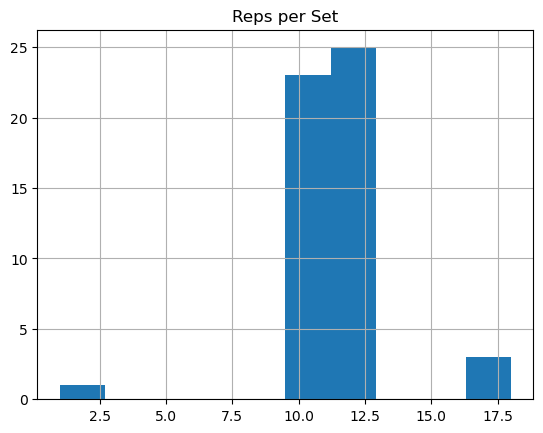

In [29]:
# Histogram of Reps per Set
mydata.hist()
mp.pyplot.show()